In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polyplotter as pp

In [27]:
def residuals(f, *args, func=None, data=None):
    return np.abs(data-func(f, *args))**2

def resonator_fit(freqs, data, func, p0, plot=True):
    popt, pcov = curve_fit(partial(residuals, data=data, func=func), freqs, 0*freqs, p0=p0)
    if plot:
        plot_data_fit(freqs, data, func, popt)
    return popt

def plot_data_fit(x, data, fitf, popt):
    plt.figure()
    smooth_x = np.linspace(x[0], x[-1], 10000)
    fit = fitf(smooth_x, *popt)
    fit_pts = fitf(x, *popt)
    f1 = plt.figure()
    ax1 = f1.subplots()
    f2 = plt.figure()
    ax2 = f2.subplots()
    f3 = plt.figure()
    ax3 = f3.subplots()
    axs = (ax1, ax2, ax3)
    plot_complex(x, data, fmt='k.', axs=axs)
    plot_complex(smooth_x, fit, fmt='r--', axs=axs)
    
def plot_complex(x, data, fmt='k.', axs=None, label=None):
    if axs is None:
        f1 = plt.figure()
        ax1 = f1.subplots()
        f2 = plt.figure()
        ax2 = f2.subplots()
        f3 = plt.figure()
        ax3 = f3.subplots()
    else:
        ax1, ax2, ax3 = axs

    ax1.plot(x, np.abs(data), fmt, label=label)
    ax2.plot(x, np.unwrap(np.angle(data)), fmt, label=label)
    ax3.plot(np.real(data), np.imag(data), fmt, label=label)
    rough_fres_ind = np.argmin(np.abs(data))
    ax3.plot(np.real(data[rough_fres_ind]), np.imag(data[rough_fres_ind]), 'rx')
    ax3.plot([-1,1], [0,0], 'k--')
    ax3.plot([0,0], [-1,1], 'k--')

In [2]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230406_Al_near_47_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [3]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.5 # mm
lengths = np.arange(46, 48+dl, dl)

5


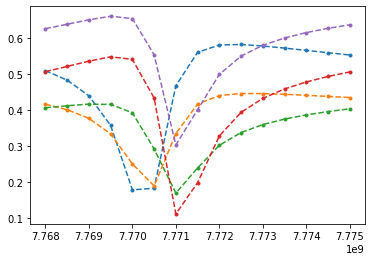

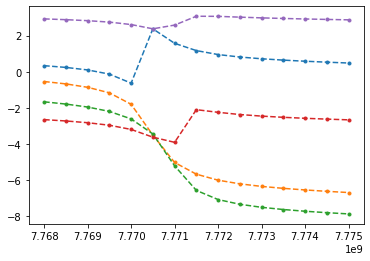

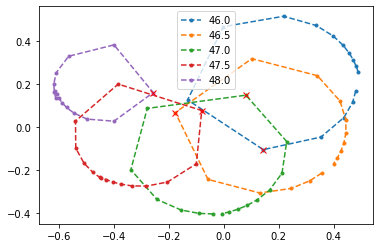

In [9]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 0
end = 0
print(len(lengths) - start - end)
for i in range(start,fs.shape[0]-end):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{(i-start)}.', label=lengths[i])
plt.legend()

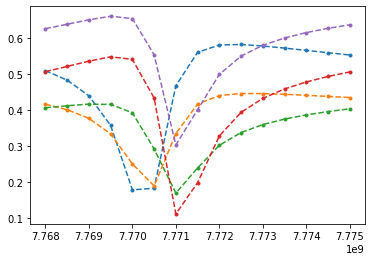

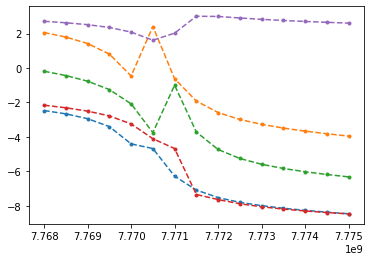

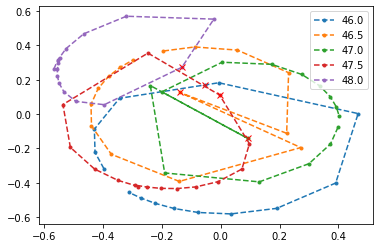

In [11]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
for i in range(start,fs.shape[0]-end):
    eta = np.exp(1j*np.angle(s11s[i]))
    s11_rotated = s11s[i]*-eta
    plot_complex(fs[i], s11_rotated, axs=axs, fmt=f'--C{(i-start)}.', label=lengths[i])
plt.legend()

(0.9438988316290837-0.3302347583905283j) 0.9999999999999999


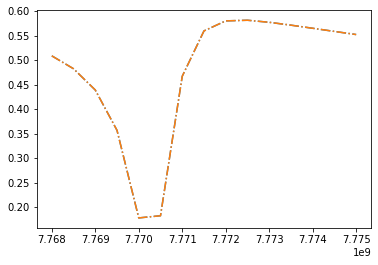

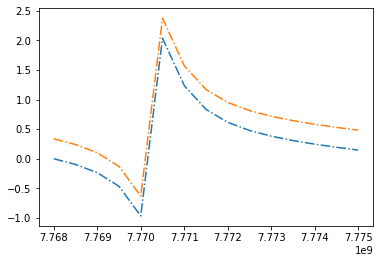

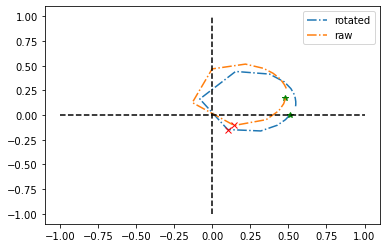

In [25]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)

ind = 0

eta = np.exp(-1j*np.angle(s11s[ind][0]))
s11_rotated = s11s[ind]*eta
plot_complex(fs[ind], s11_rotated, axs=axs, fmt=f'-.', label="rotated")
ax3.plot(np.real(s11s[ind][0]), np.imag(s11s[ind][0]), 'g*')
ax3.plot(np.real(s11s[ind][0]*eta), np.imag(s11s[ind][0]*eta), 'g*')
plot_complex(fs[ind], s11s[ind], axs=axs, fmt=f'-.', label="raw")
axs[2].plot([-1,1], [0,0], 'k--')
axs[2].plot([0,0], [-1,1], 'k--')
plt.legend()
print(eta, np.abs(eta))

(-0.9769029580231795-0.21368343549644164j) 0.9999999999999999


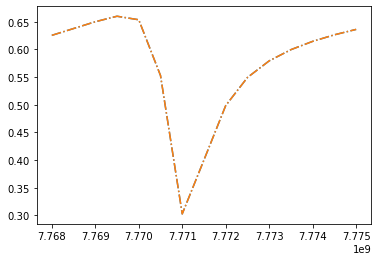

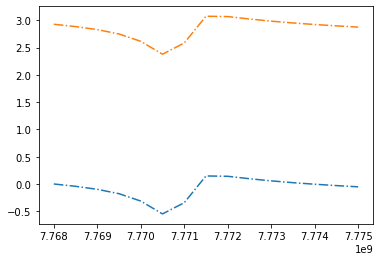

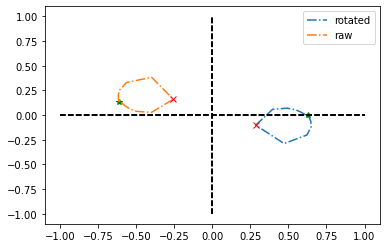

In [29]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)

ind = -1

eta = np.exp(-1j*np.angle(s11s[ind][0]))
s11_rotated = s11s[ind]*eta
plot_complex(fs[ind], s11_rotated, axs=axs, fmt=f'-.', label="rotated")
ax3.plot(np.real(s11s[ind][0]), np.imag(s11s[ind][0]), 'g*')
ax3.plot(np.real(s11s[ind][0]*eta), np.imag(s11s[ind][0]*eta), 'g*')
plot_complex(fs[ind], s11s[ind], axs=axs, fmt=f'-.', label="raw")
axs[2].plot([-1,1], [0,0], 'k--')
axs[2].plot([0,0], [-1,1], 'k--')
plt.legend()
print(eta, np.abs(eta))

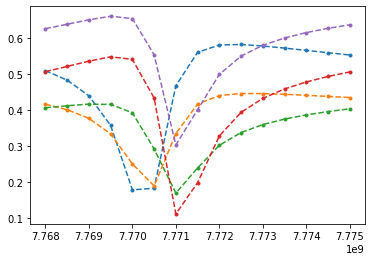

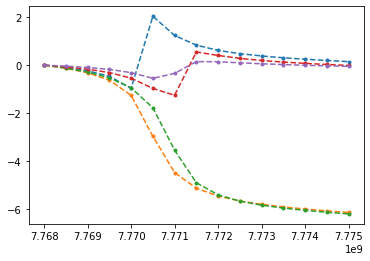

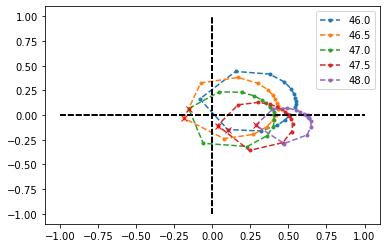

In [28]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
for i in range(start,fs.shape[0]-end):
    eta = np.exp(-1j*np.angle(s11s[i][0]))
    s11_rotated = s11s[i]*eta
    plot_complex(fs[i], s11_rotated, axs=axs, fmt=f'--C{(i-start)}.', label=lengths[i])
plt.legend()

In [32]:
def plot_rotated(fs, s11s):
    f1 = plt.figure()
    ax1 = f1.subplots()
    f2 = plt.figure()
    ax2 = f2.subplots()
    f3 = plt.figure()
    ax3 = f3.subplots()
    axs = (ax1, ax2, ax3)
    for i in range(start,fs.shape[0]-end):
        eta = np.exp(-1j*np.angle(s11s[i][0]))
        s11_rotated = s11s[i]*eta
        plot_complex(fs[i], s11_rotated, axs=axs, fmt=f'--C{(i-start)//2}.', label=lengths[i])
    plt.legend()

../../data/simulated_S11_data/


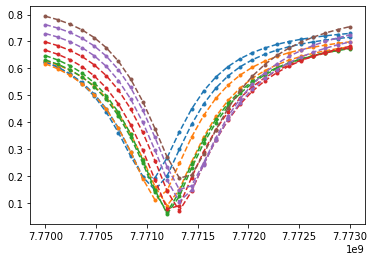

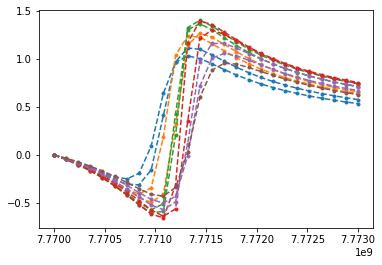

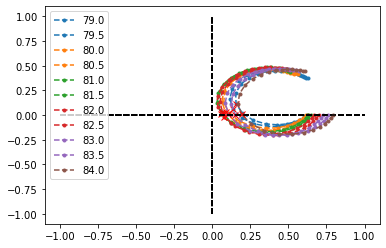

In [33]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230403_Al_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.5 # mm
lengths = np.arange(79, 84+dl, dl)

plot_rotated(fs, s11s)

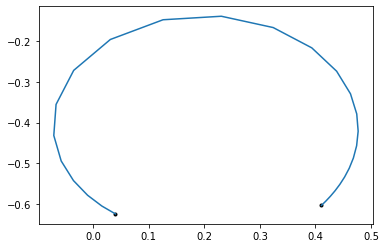

In [51]:
endpts = np.array([[np.real(s11s[:,0]), np.imag(s11s[:,0])], [np.real(s11s[:,-1]), np.imag(s11s[:,-1])]])
endpts = np.swapaxes(endpts, 2,0)
# now it's (N, [real/im], [start/end])
plt.plot(endpts[0,0], endpts[0,1], 'k.')
plt.plot(np.real(s11s[0]), np.imag(s11s[0]))

[[ 0.04008952  0.41080673]
 [-0.62441441 -0.60338847]]


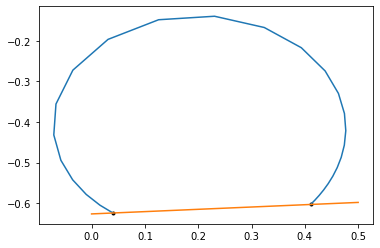

In [67]:
slopes = (endpts[:,1,1] - endpts[:,1,0])/(endpts[:,0,1] - endpts[:,0,0])
tan_lines = np.array([slopes, endpts[:,1,0] - slopes*endpts[:,0,0]])
perp_lines = np.array([-1/slopes, endpts[:,1,0] + 1/slopes*endpts[:,0,0]])


plt.plot(endpts[0,0], endpts[0,1], 'k.')
plt.plot(np.real(s11s[0]), np.imag(s11s[0]))
xs1 = np.linspace(0, 0.5)
xs2 = np.linspace(0.2, 0.3)
plt.plot(xs1, np.polyval(tan_lines[:,0], xs1))
#plt.plot(xs2, np.polyval(perp_lines[:,0], xs2))
print(endpts[0])

[[-0.1853586   0.1853586 ]
 [-0.01051297  0.01051297]]
[[-0.1945003   0.1945003 ]
 [ 0.01641829 -0.01641829]]
[[-0.20243895  0.20243895]
 [ 0.05469414 -0.05469414]]
[[-0.1946143   0.1946143 ]
 [ 0.08380217 -0.08380217]]
[[-0.18450533  0.18450533]
 [ 0.13281153 -0.13281153]]
[[-0.15785969  0.15785969]
 [ 0.18072713 -0.18072713]]
[[-0.12093489  0.12093489]
 [ 0.21548133 -0.21548133]]
[[-0.07733495  0.07733495]
 [ 0.23794171 -0.23794171]]
[[-0.02105111  0.02105111]
 [ 0.24823345 -0.24823345]]
[[ 0.03358543 -0.03358543]
 [ 0.24267899 -0.24267899]]
[[ 0.08645861 -0.08645861]
 [ 0.22352302 -0.22352302]]


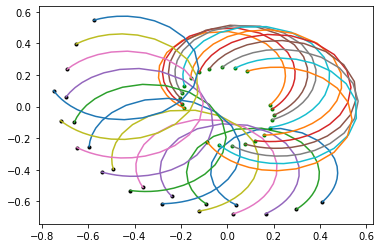

In [75]:
for i,ptpair in enumerate(endpts):
    # find midpoints, subtract off
    midpt = np.mean(ptpair, axis=1)
    centered_ptpair = (ptpair.T - midpt).T
    print(centered_ptpair)
    
    plt.plot(ptpair[0], ptpair[1], 'k.')
    plt.plot(np.real(s11s[i]), np.imag(s11s[i]))
    
    plt.plot(centered_ptpair[0], centered_ptpair[1], 'g.')
    plt.plot(np.real(s11s[i])-midpt[0], np.imag(s11s[i])-midpt[1])

In [78]:
rotmat = np.array([[0,-1],[1,0]])

vecs = np.array([[2,1]])

np.matmul(rotmat, vecs[0])

[2 1]


array([-1,  2])

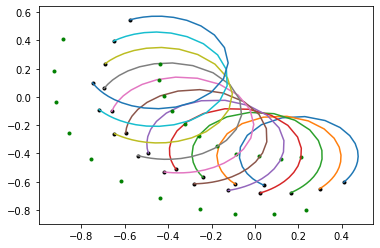

In [87]:
rotmat = np.array([[0,-1],[1,0]])

for i,ptpair in enumerate(endpts):
    # find midpoints, subtract off
    midpt = np.mean(ptpair, axis=1)
    centered_ptpair = (ptpair.T - midpt).T

    # rotate point pairs 90*
    rot_cen_ptpair = np.matmul(rotmat, centered_ptpair)
    
    # re-add midpoints
    rot_pair = (rot_cen_ptpair.T + midpt).T
    #print(rot_pair)

    plt.plot(ptpair[0], ptpair[1], 'k.')
    plt.plot(np.real(s11s[i]), np.imag(s11s[i]))
    
    plt.plot(rot_pair[0], rot_pair[1], 'g.')

In [89]:
from ellipse import LsqEllipse
from matplotlib.patches import Ellipse

center of fitted circle = (0.012051601995345959, 0.12412488123970424) 
 radius = 0.9481192340817389 +/- stddev= 0.0066806238610960245


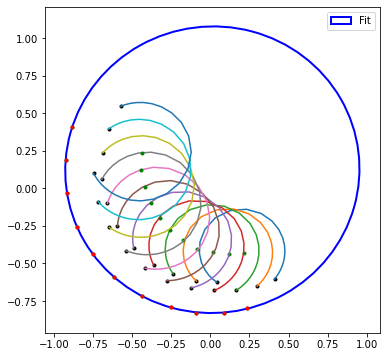

In [100]:
rotmat = np.array([[0,-1],[1,0]])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

outer_pts = np.zeros((endpts.shape[0], 2))

for i,ptpair in enumerate(endpts):
    # find midpoints, subtract off
    midpt = np.mean(ptpair, axis=1)
    centered_ptpair = (ptpair.T - midpt).T

    # rotate point pairs 90*
    rot_cen_ptpair = np.matmul(rotmat, centered_ptpair)
    
    # re-add midpoints
    rot_pair = (rot_cen_ptpair.T + midpt).T
    
    outer_pts[i] = rot_pair[:,0]
    
    ax.plot(ptpair[0], ptpair[1], 'k.')
    ax.plot(np.real(s11s[i]), np.imag(s11s[i]))
    
    ax.plot(rot_pair[0], rot_pair[1], 'g.')

# fit ellipse to outer points (inner would work too?)

lsqe = LsqEllipse()
lsqe.fit(outer_pts)
center, width, height, phi = lsqe.as_parameters()


ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
              edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.plot(outer_pts[:,0], outer_pts[:,1], 'r.')
print('center of fitted circle =',center, '\n','radius =', np.mean([width,height]),'+/- stddev=',np.std([width,height]))
plt.legend()
plt.show()

In [ ]:
rotmat = np.array([[0,-1],[1,0]])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

outer_pts = np.zeros((endpts.shape[0], 2))

for i,ptpair in enumerate(endpts):
    # find midpoints, subtract off
    midpt = np.mean(ptpair, axis=1)
    centered_ptpair = (ptpair.T - midpt).T

    # rotate point pairs 90*
    rot_cen_ptpair = np.matmul(rotmat, centered_ptpair)
    
    # re-add midpoints
    rot_pair = (rot_cen_ptpair.T + midpt).T
    
    outer_pts[i] = rot_pair[:,0]
    
    ax.plot(ptpair[0], ptpair[1], 'k.')
    ax.plot(np.real(s11s[i]), np.imag(s11s[i]))
    
    ax.plot(rot_pair[0], rot_pair[1], 'g.')

# fit ellipse to outer points (inner would work too?)

lsqe = LsqEllipse()
lsqe.fit(outer_pts)
center, width, height, phi = lsqe.as_parameters()